In [28]:
!pip install scikit-learn

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,confusion_matrix,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import joblib

In [13]:
df = pd.read_csv('/content/sample_data/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


We see that they are continous values so this is a regression problem.

In [14]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [15]:
df.duplicated().sum()

0

**DATA VISUALIZATION-**

<Axes: xlabel='bedrooms', ylabel='price'>

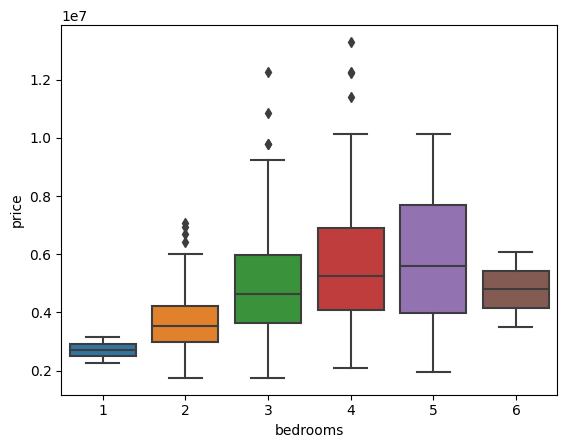

In [21]:
sns.boxplot(x='bedrooms',y='price', data=df)

<Axes: xlabel='furnishingstatus', ylabel='price'>

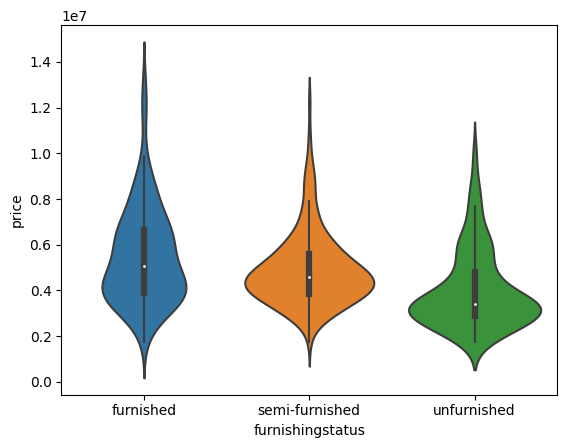

In [22]:
sns.violinplot(x='furnishingstatus',y='price', data=df)

<Axes: xlabel='parking', ylabel='price'>

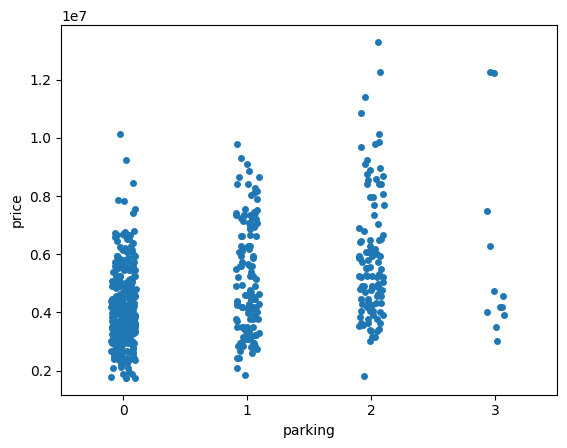

In [24]:
sns.stripplot(x='parking',y='price', data=df)

**Kendall correlation**




In [27]:
corr =df.corr()
corr

<ipython-input-27-7f1c8787b358>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr =df.corr()


,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


In [36]:
labels = LabelEncoder()

In [37]:
data = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']
for i in data:
    df[i] = labels.fit_transform(df[i])

In [38]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


**DATA SPLIT (70-30)**

In [40]:
x=df.drop('price',axis=1)
y=df.price
print(x.head())
print(y.head())

   area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0  7420         4          2        3         1          0         0   
1  8960         4          4        4         1          0         0   
2  9960         3          2        2         1          0         1   
3  7500         4          2        2         1          0         1   
4  7420         4          1        2         1          1         1   

   hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
0                0                1        2         1                 0  
1                0                1        3         0                 0  
2                0                0        2         1                 1  
3                0                1        3         1                 0  
4                0                1        2         0                 0  
0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64


In [41]:
print(type(x))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [43]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 5)

**EVALUATION FUNCTIONS-**

In [44]:
def eval(model):
    print("Training score-",model.score(x_train,y_train),end='\n')
    print("Testing score-",model.score(x_test,y_test))

In [45]:
def metric_score(ypred,y_test):
    print("Mean absolute error: ",mean_absolute_error(ypred,y_test))
    print("Mean squared error: ",mean_squared_error(ypred,y_test))
    print("R2 score: ",r2_score(ypred,y_test))

**MODEL TESTS-**

MODEL 1- **Random Forest**

In [60]:
rf_model = RandomForestRegressor()
rf_model.fit(x_train,y_train)

RandomForestRegressor()

In [61]:
eval(rf_model)

Training score- 0.9443885683289214
Testing score- 0.6300049232296501


In [64]:
ypred1 = rf_model.predict(x_test)
metric_score(ypred1,y_test)

Mean absolute error:  747135.7449186991
Mean squared error:  928518218531.7368
R2 score:  0.48596507705614334


**MODEL 2- DECISION TREE**

In [66]:
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train,y_train)

DecisionTreeRegressor()

In [68]:
eval(dt_model)

Training score- 0.9998087063712079
Testing score- 0.03985118053258618


In [69]:
ypred2 = dt_model.predict(x_test)

In [75]:
metric_score(ypred2,y_test)

Mean absolute error:  1155495.1219512196
Mean squared error:  2409533875853.6587
R2 score:  0.27818230241392095


**MODEL 3 - LINEAR REGRESSION**

In [72]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [73]:
eval(lr_model)

Training score- 0.6722721620878298
Testing score- 0.670112729781189


In [74]:
ypred3 = lr_model.predict(x_test)

In [76]:
metric_score(ypred3, y_test)

Mean absolute error:  721569.6538611307
Mean squared error:  827865989822.312
R2 score:  0.5614064514555352


**R2 SCORE PLOT**

(0.0, 1.0)

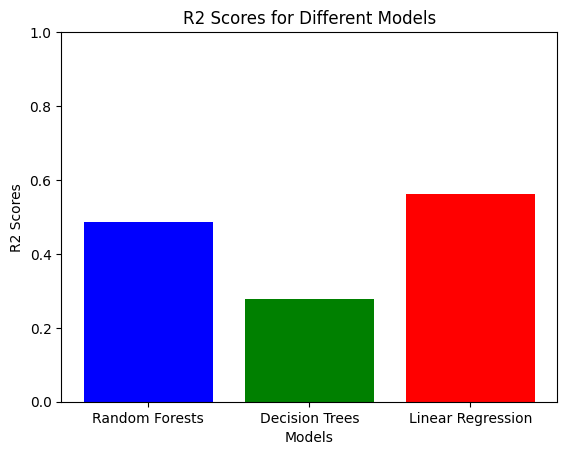

In [94]:
models = ['Random Forests', 'Decision Trees', 'Linear Regression']
R2_scores=[0.48596507705614334, 0.27818230241392095, 0.5614064514555352]

plt.bar(models, R2_scores, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('R2 Scores')
plt.title('R2 Scores for Different Models')
plt.ylim(0, 1)

In [97]:
joblib.dump(lr_model, 'lr_model.pkl')

['lr_model.pkl']